In [80]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch12_데이터시각화_matplotlib</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplotlib 기반으로 다양한 색상, 테마, 차트 기능, groupby 기능 포함

# 1절. matplotlib
 - https://matplotlib.org/stable/api/index.html

## 1.1 패키지 import 및 기본 설정

In [4]:
# 시작전 설정
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  
    # 주피터 노트북을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌. 안해도 요즘은 나온다
%config InlineBackend.figure_format='retina'  
    # 그래프를 더 높은 해상도로 그려줌
#한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
#plt.rc('font', family='AppleGothic') # mac
plt.rc('axes', unicode_minus=False)  # 축의 - 깨짐 방지
# 경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2. 그래프 생성(레이아웃, 그래프 종류, 그래프 사이즈 등 설정)
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징(제목, 라벨링, 축/데이터 설명 추가 등)
    5. 그래프 출력 및 저장

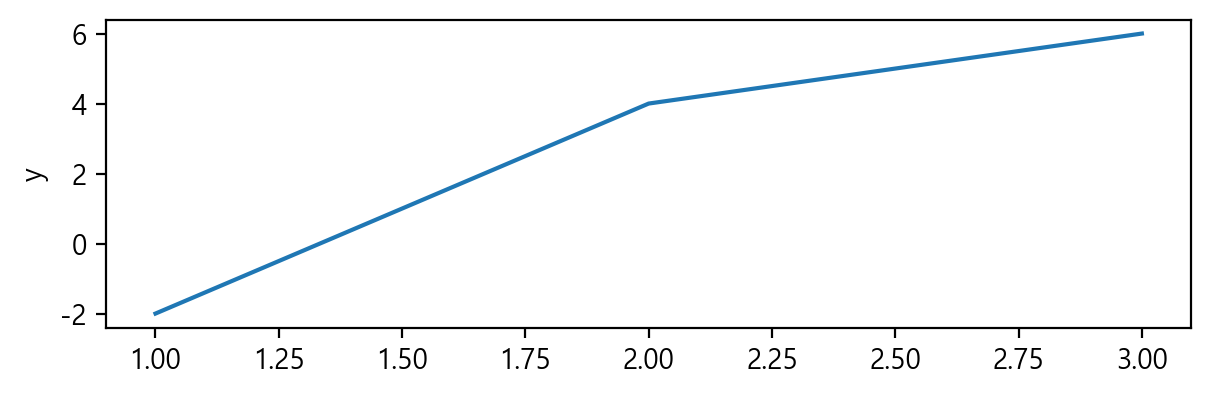

In [17]:
x = [1,2,3]
y = [-2, 4,6]    # 1. 데이터준비
plt.figure(figsize=(7,2))   # 2. 그래프 객체 생성
plt.plot(x,y)    # 3. 그래프 그리기
plt.ylabel('y')  # 4. 그래프 커스터마이징
plt.show()       # 5. 그래프 출력

## 1.3 그래프 영역 나누기
### 1) subplot() 함수로 서브플롯 추가

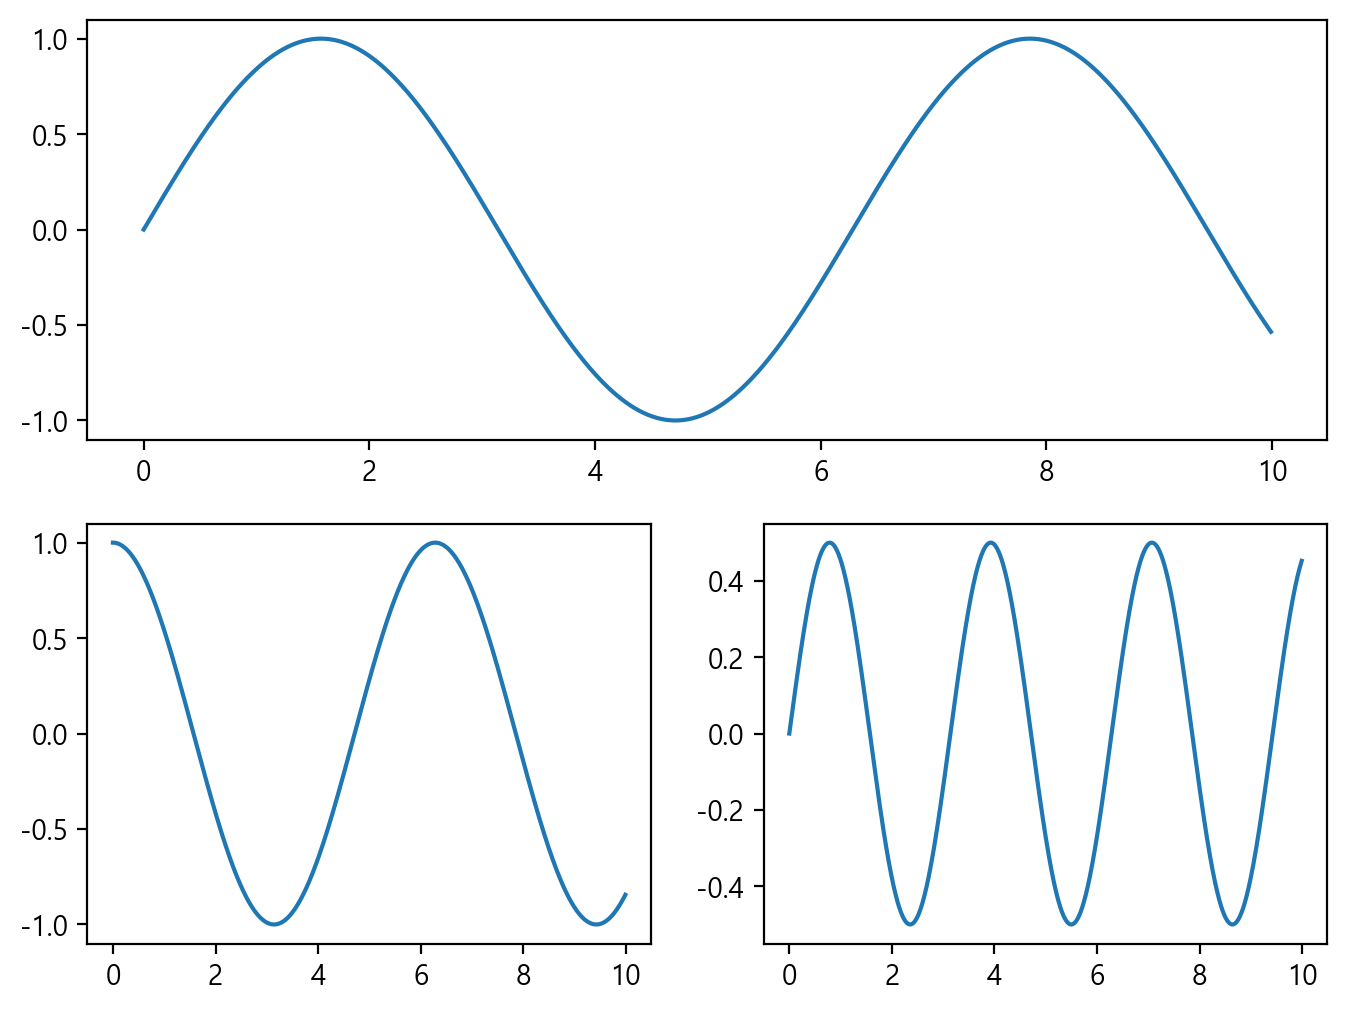

In [26]:
import numpy as np
x = np.arange(0,10,0.01)
plt.figure(figsize=(8,6))
plt.subplot(2,1,1);plt.plot(x, np.sin(x))   # 그래프를 2행 1열로 그렸을때 1번에 위치
plt.subplot(2,2,3);plt.plot(x, np.cos(x))   # 그래프를 2행 2열로 그렸을때 3번에 위치
plt.subplot(2,2,4);plt.plot(x, np.sin(x)*np.cos(x))  # 그래프를 2행 2열로 그렸을때 4번에 위치
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- 교안 (14page) : https://wikidocs.net.92085

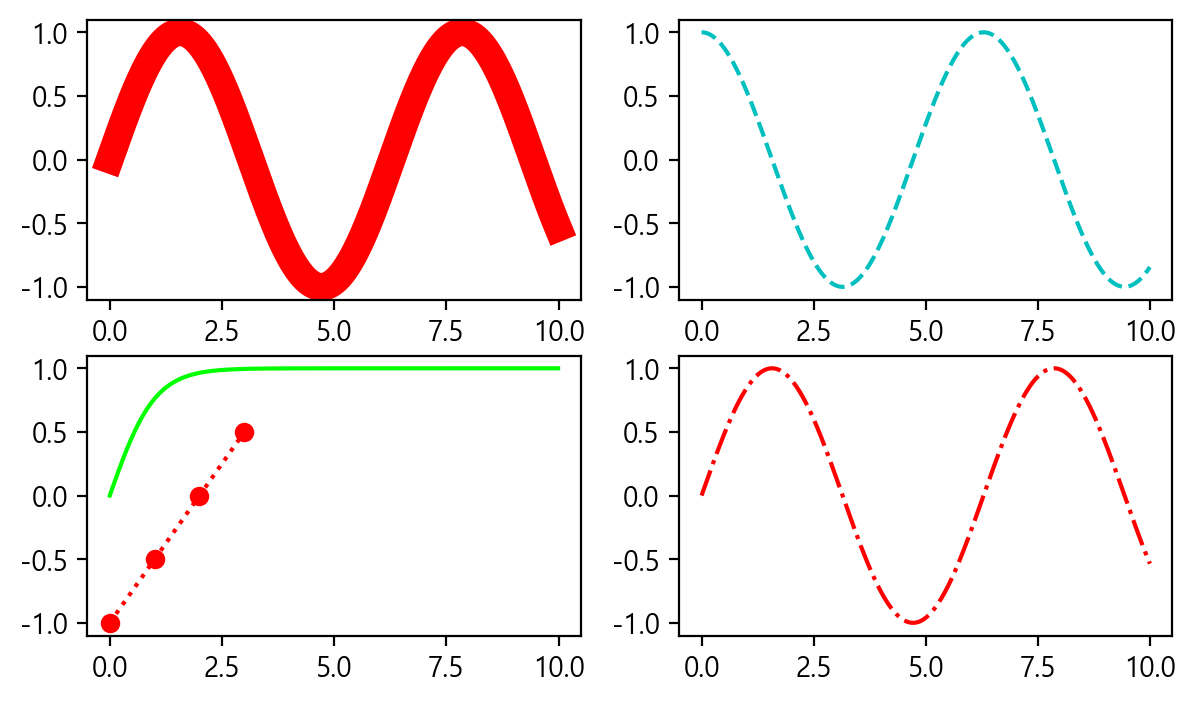

In [32]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), color = 'c', linestyle='--') # linestyle=':'(점선), '--'(긴점선), '-'(실선)
axes[1,0].plot([0,1,2,3], [-1, -0.5, 0, 0.5], 'ro:') #  'ro:'   # == color : r, marker : 'o', linestyle : ':'
axes[1,0].plot(x, np.tanh(x), '#00ff00')  # color : #00ff00
axes[1,1].plot(x, np.sin(x), 'r-.')  # 'r-.' == color : r, linestyle : '-.'

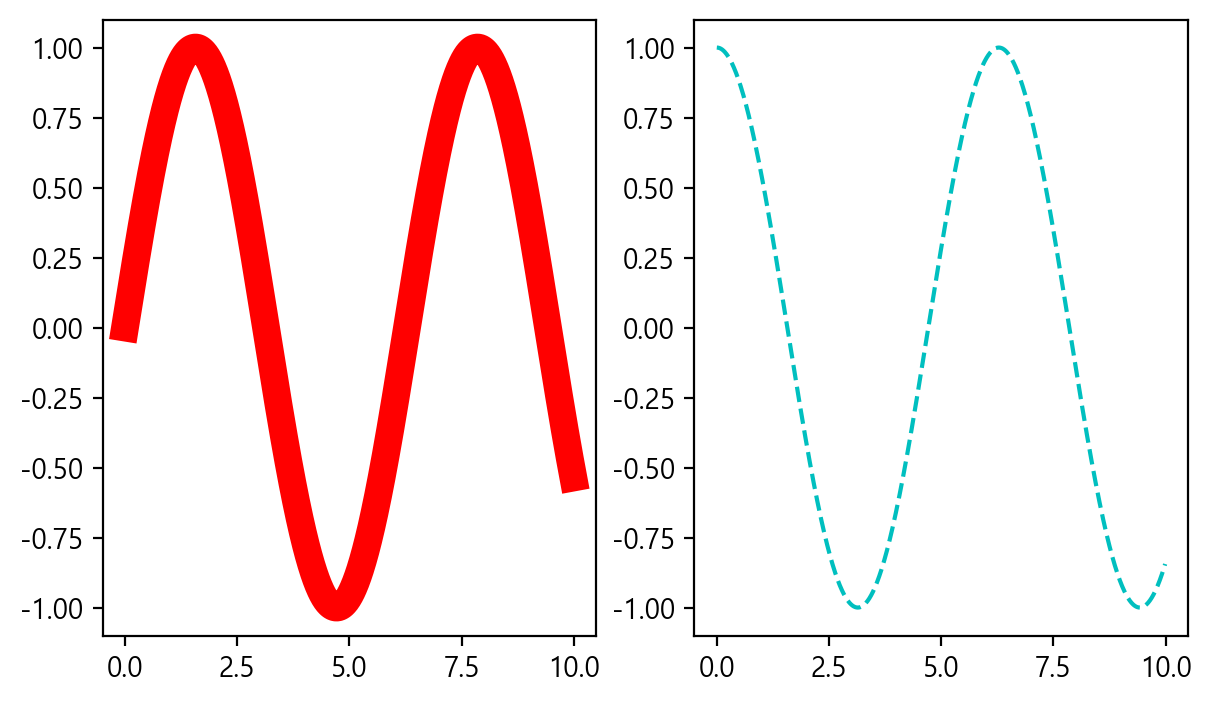

In [34]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7,4))  # nrows=1 이 기본값, 이렇게 쓰면 1차원이므로 axes[0], axes[1] 이렇게 바꿔써야함
axes[0].plot(x, np.sin(x), 'r', linewidth=10)
axes[1].plot(x, np.cos(x), color = 'c', linestyle='--') # linestyle=':'(점선), '--'(긴점선), '-'(실선)

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind = 'line', figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter, bar(바), barh(가로바), box, pie, density, hist,...
    * xlim, ylim : 좌표들. list/tuple

In [37]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,versicolor


### 범례사용 참고 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

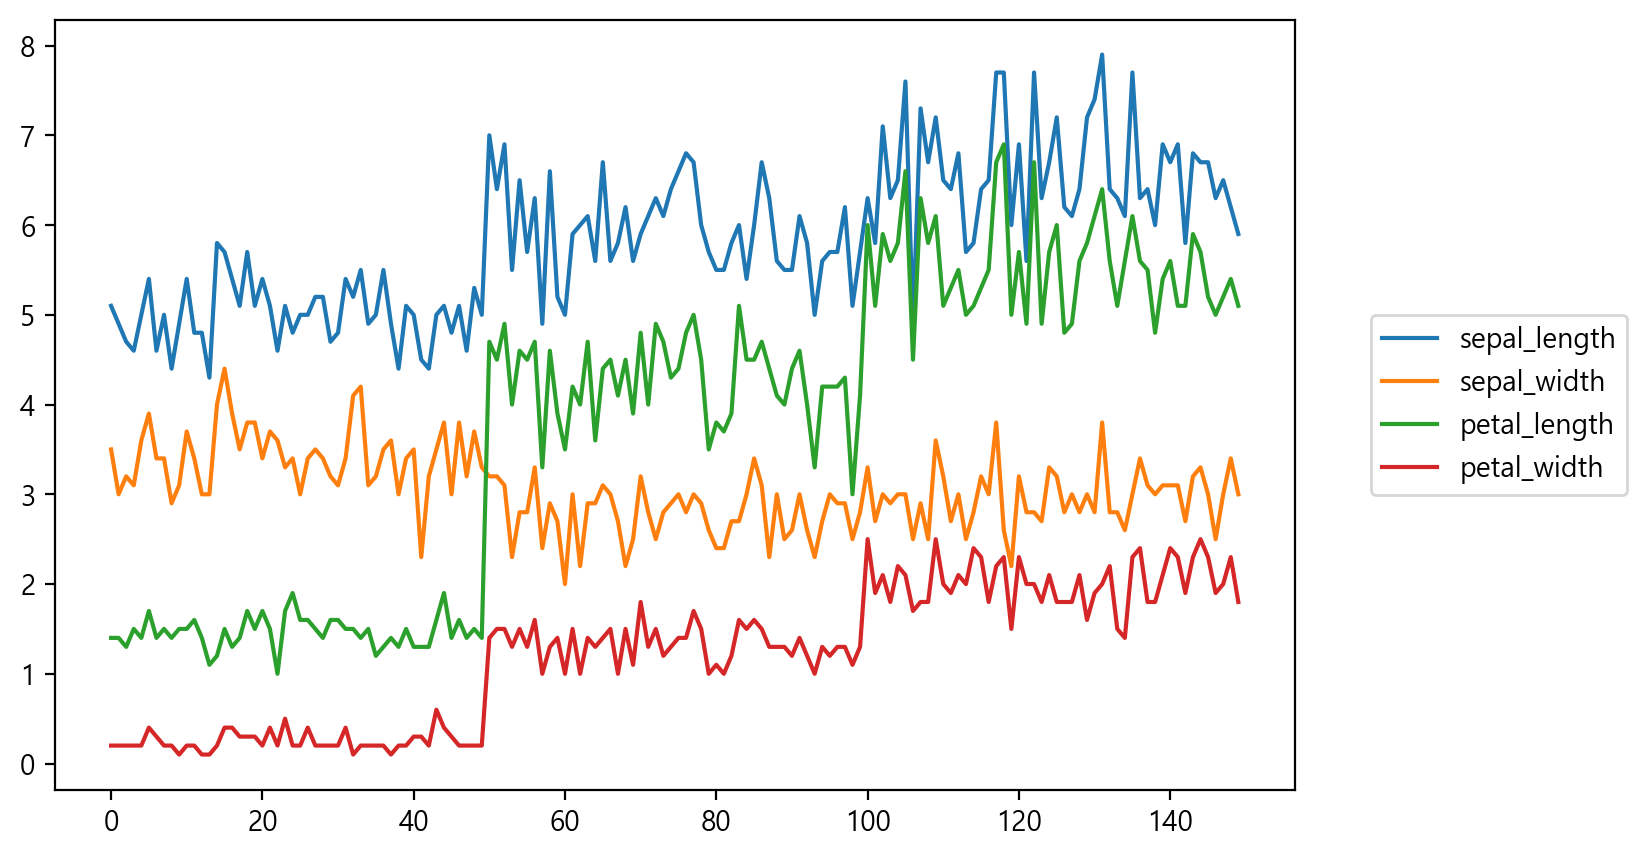

In [59]:
iris.plot(kind='line', figsize=(8,5))
# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.savefig('data/ch12_iris.jpg', bbox_inches='tight')
# plt.show()

In [67]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


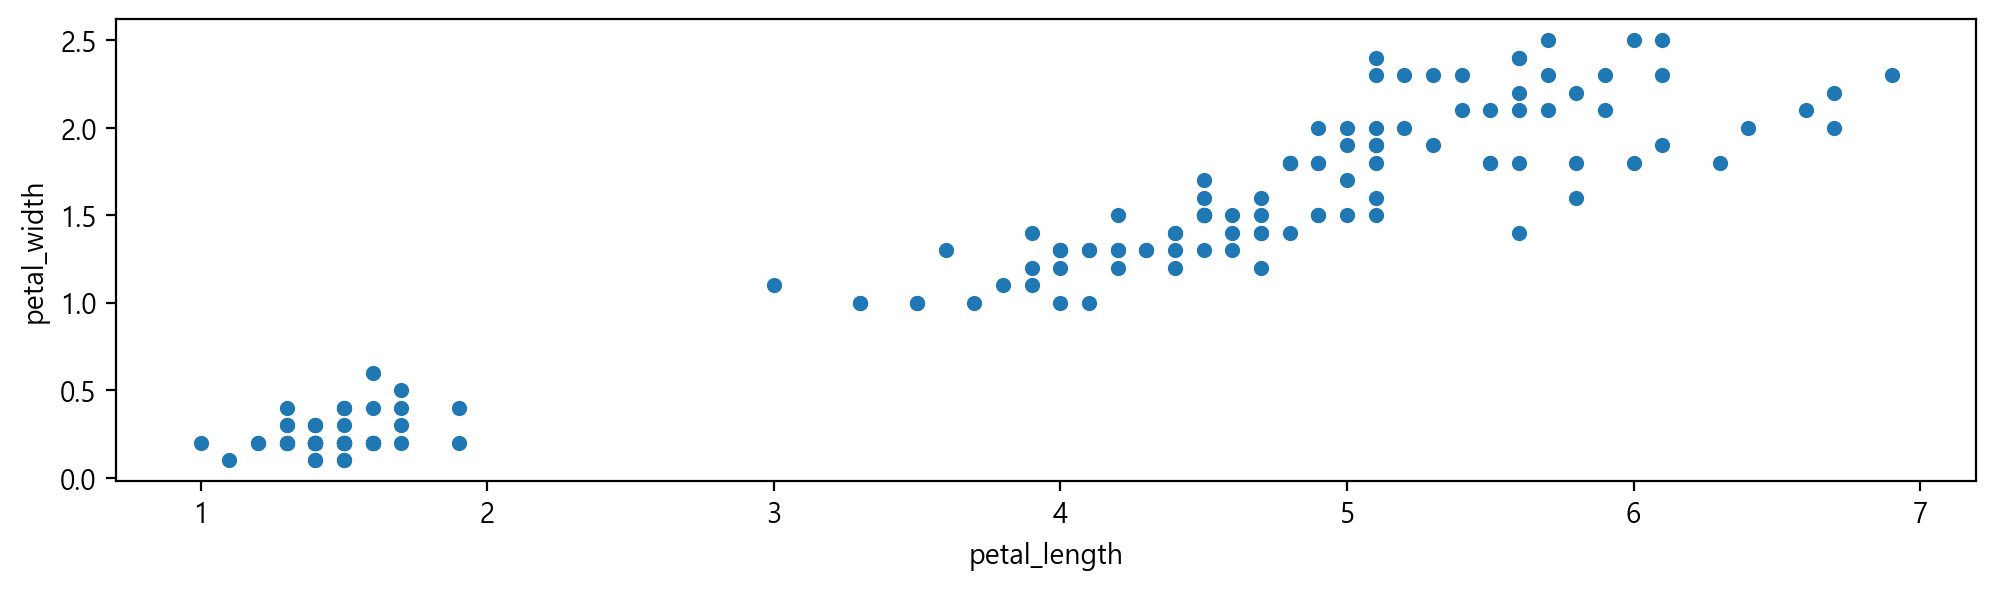

In [62]:
iris.plot(x= 'petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

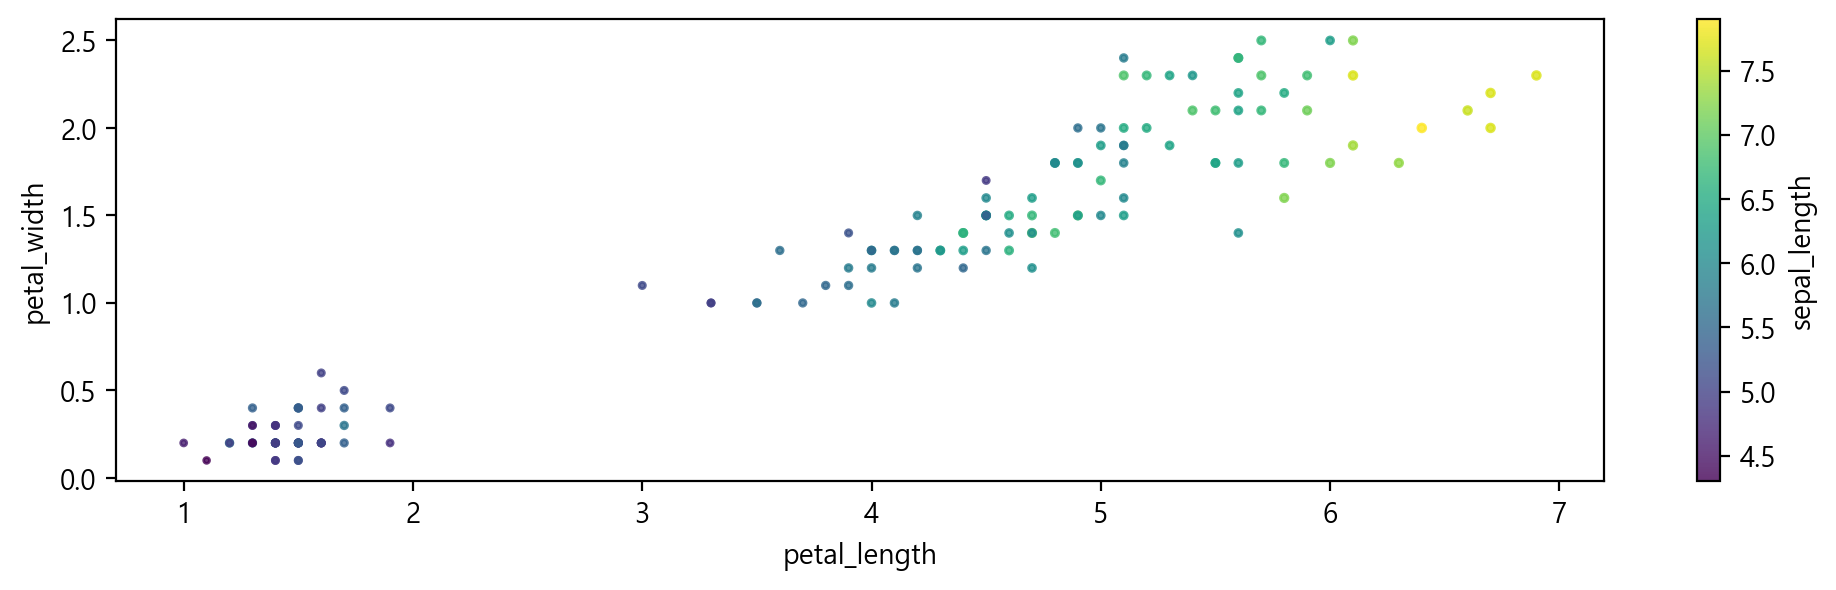

In [73]:
iris.plot(kind='scatter',
          x= 'petal_length', 
          y='petal_width',  
          figsize=(12,3),
          s = 'sepal_length',   # s : 사이즈
          c='sepal_length',     # c : color
          alpha=.8              # alpha : (투명)0<= 투명도 <=1(불투명)  
         )
plt.show()

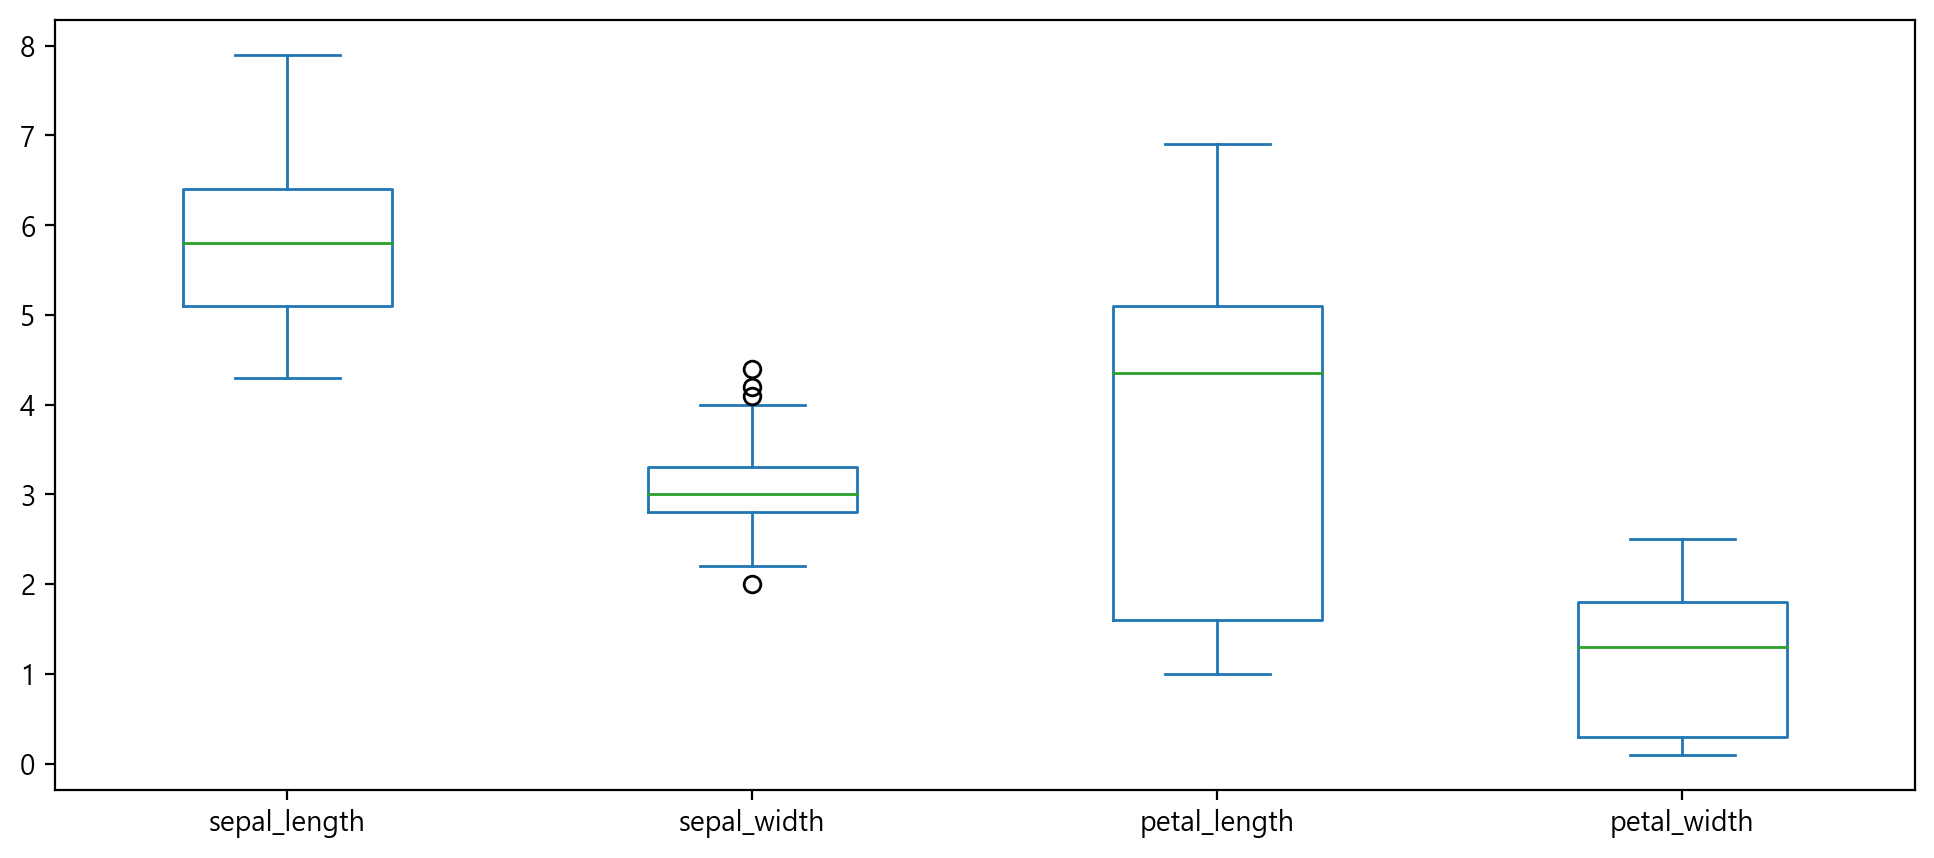

In [75]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box',
#           x= 'sepal_length', 
#           y='sepal_width',  
          figsize=(12,5))
plt.show()

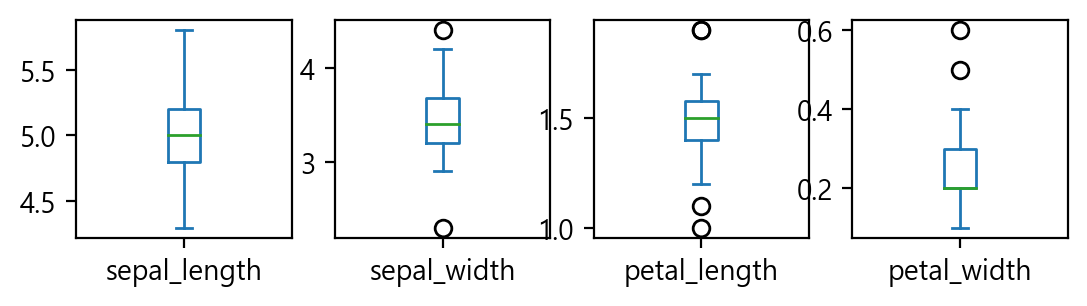

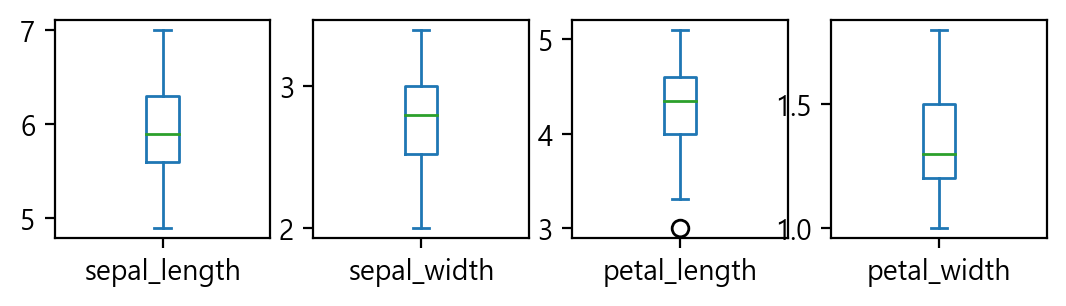

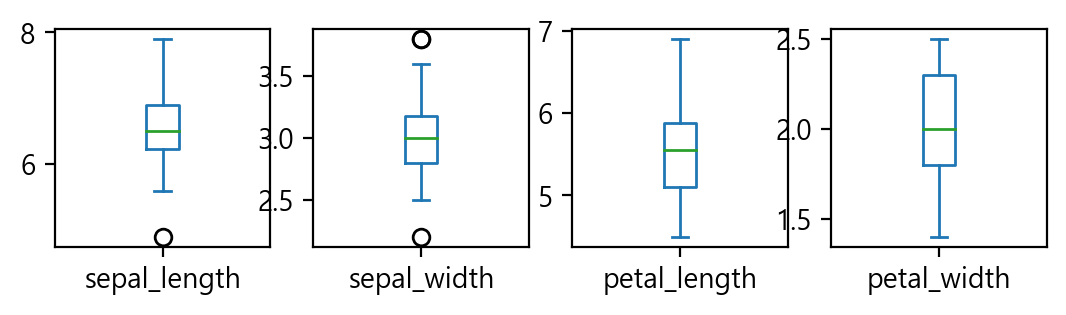

In [81]:
# 종 별 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.groupby('species').plot(kind='box',
                             subplots=True,
                             layout=(3,4),
                             sharex=True   # x축을 공통으로 그려
                             )
plt.show()

## 1.4 다양한 그래프 그리기
### 1) plt.scatter() : 산점도

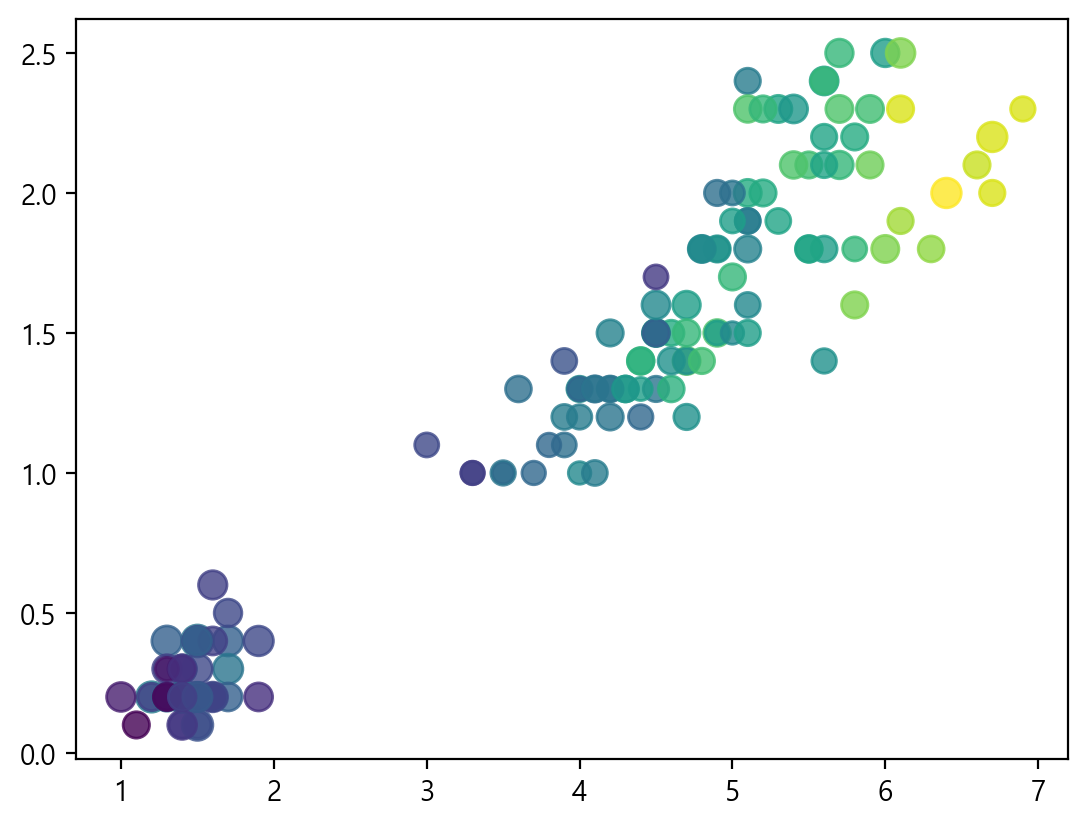

In [85]:
plt.scatter(iris.petal_length, iris.petal_width,
           s = iris.sepal_width*30,  # s : size
           c = iris.sepal_length*20,  # c : color
           alpha=.8
           )  

### 2) boxplot() 
- 장점 : 이상치 확인 단점 : 분포를 알수 없다  
- -> violinplot() 을 쓰면 분포를 알수 있음. 단 이상치 모름. 같이 써야함

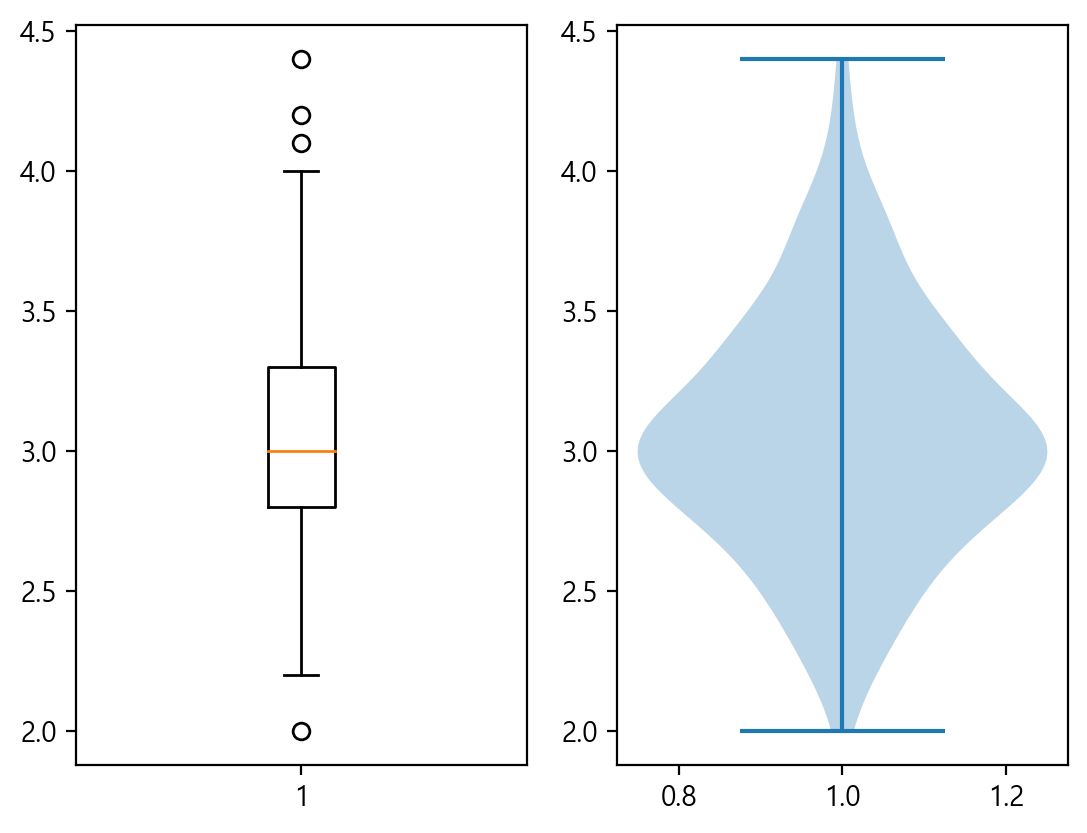

In [88]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

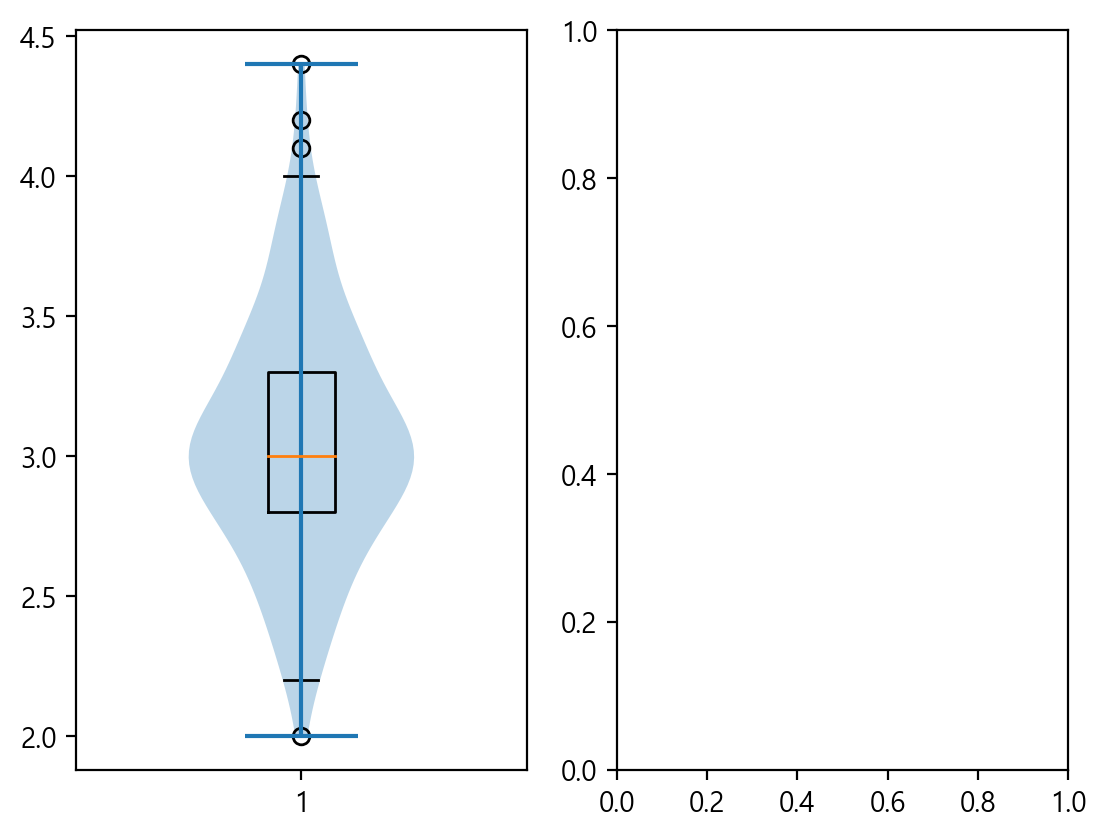

In [91]:
# 각자 장단점이 뚜렷. 그렇다면 겹쳐서 보려면?
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[0].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수평선)

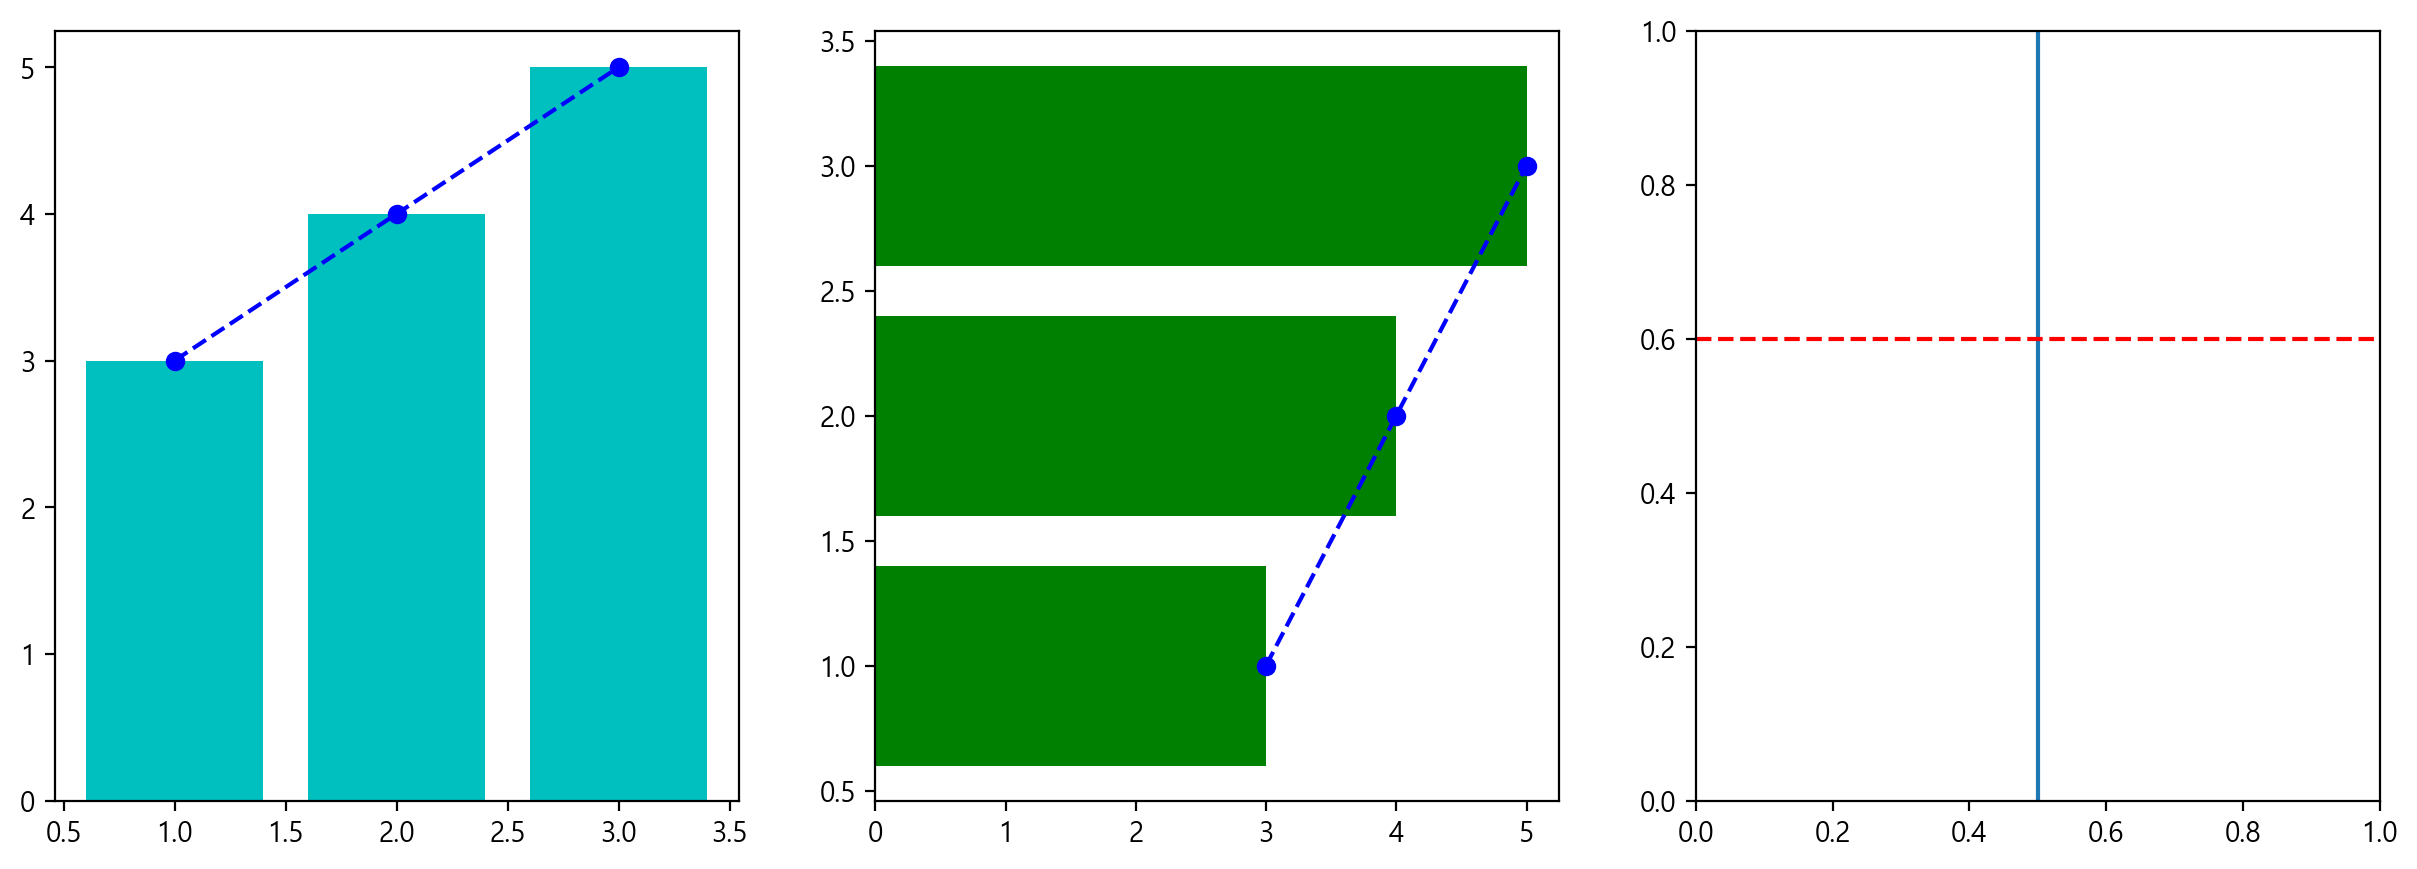

In [111]:
x = [1,2,3]
y = [3,4,5]
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
axes[0].bar(x,y,color='c')
axes[0].plot(x,y, 'bo--')
axes[1].barh(x,y,color='g')
axes[1].plot(y,x, 'bo--')  # barh는 축이 뒤바뀌기 때문에, plot의 매개변수도 바꿔서 넣어줘야한다
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')

### 4) hist() - 도수분포표;histogram
- 분포를 표시하는 것이브로, 축은 1개 만 존재, 주로 가로축(x축)으로 표시

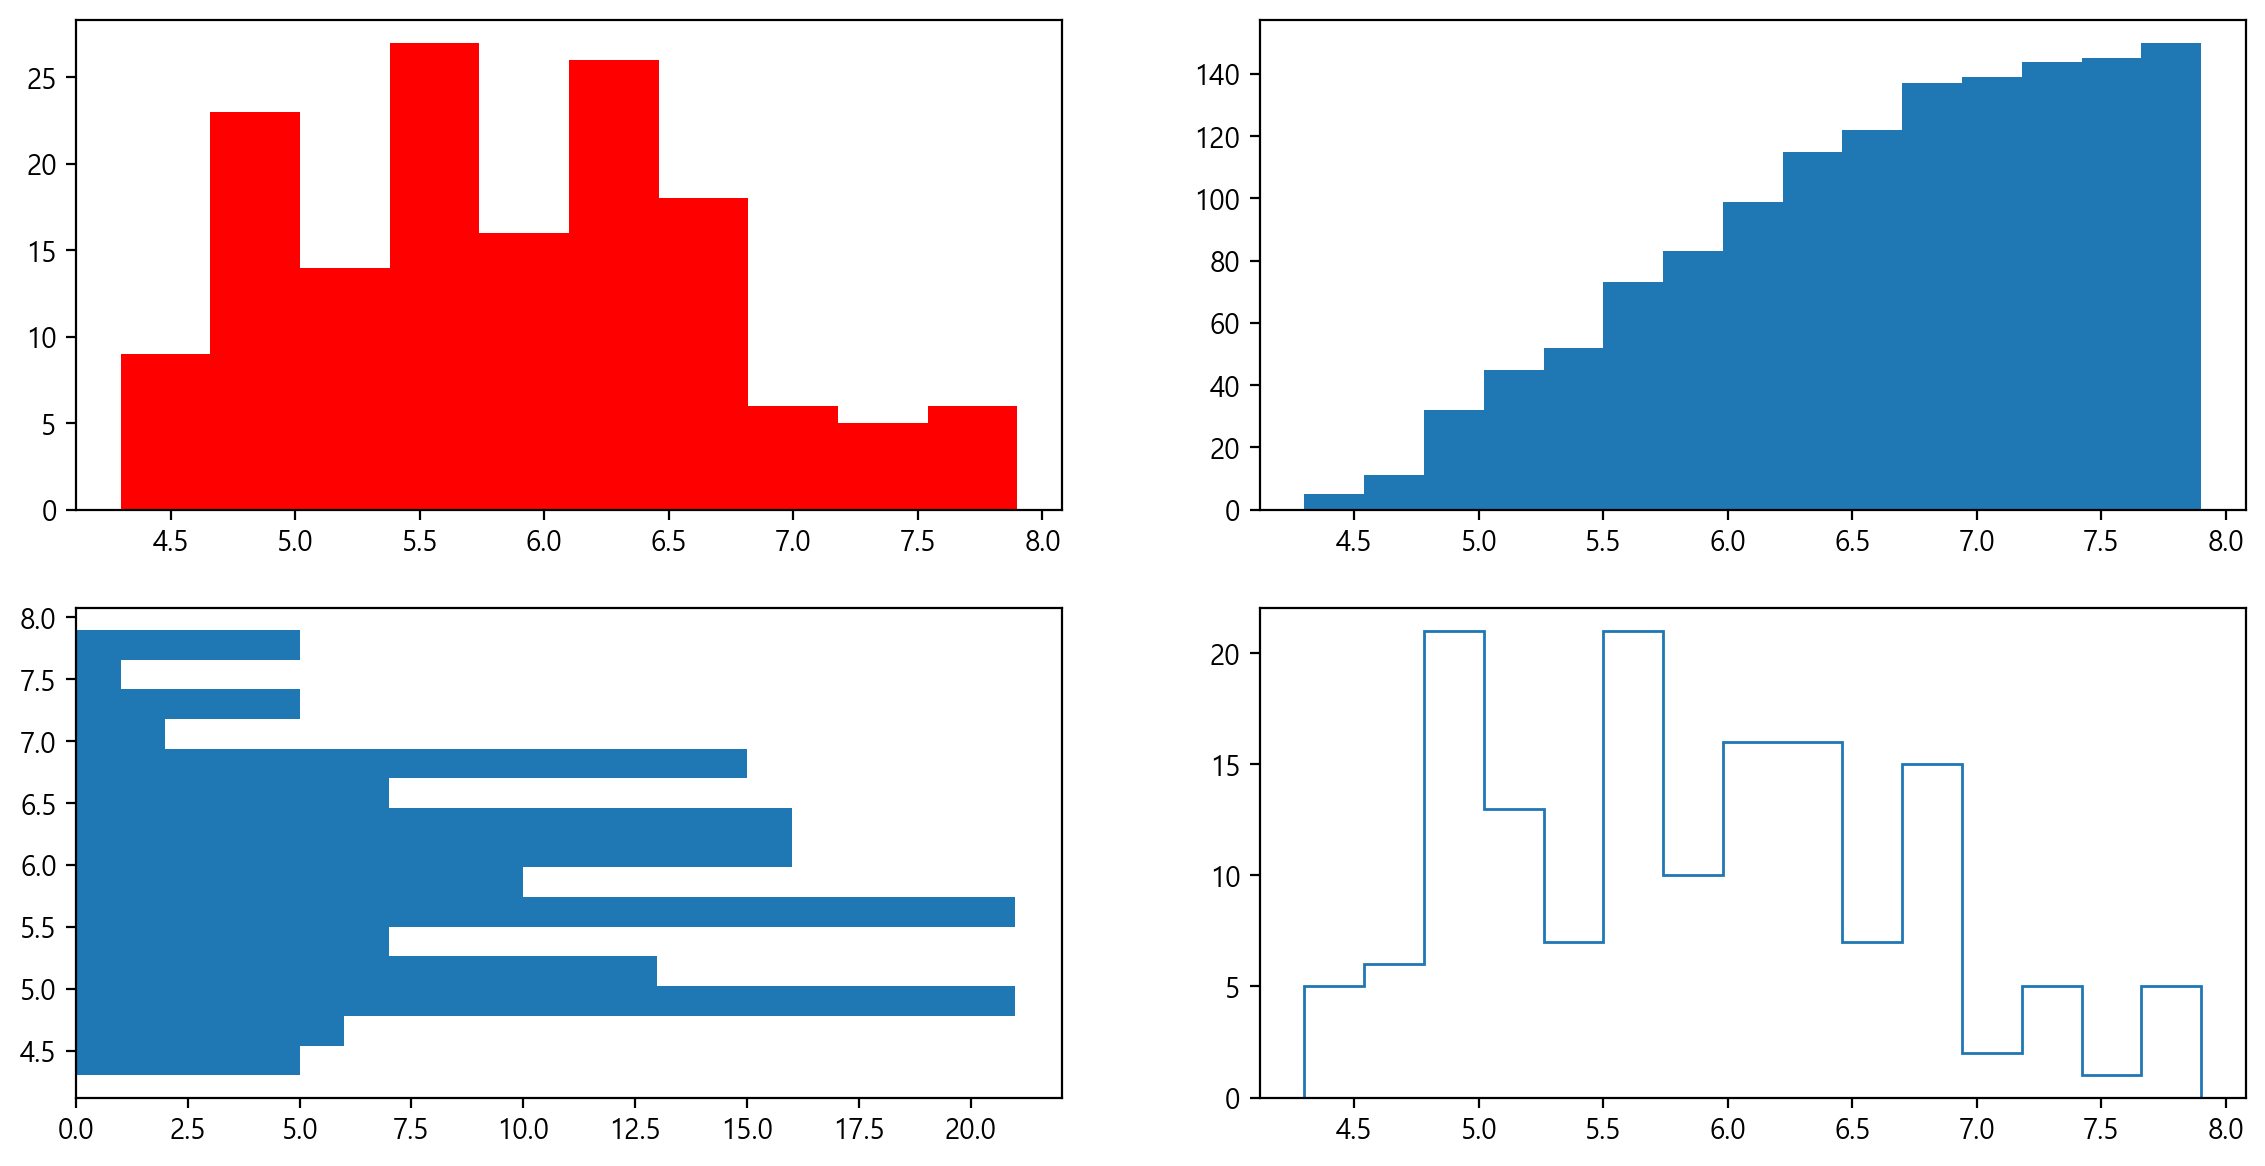

In [124]:
fig, axes = plt.subplots(2,2, figsize=(14,7))
axes[0,0].hist(iris.sepal_length, bins=10, color='r') # bins=구간수
axes[0,1].hist(iris.sepal_length, bins=15, cumulative=True) # cumulative=True 누적도수분포표로 출력한다
axes[1,0].hist(iris.sepal_length, bins=15, orientation='horizontal') # orientation='horizontal' 수평도수분포표로 변경
axes[1,1].hist(iris.sepal_length, bins=15, histtype='step')  # histtype='step' 히스토그램타입
plt.show()

## 1.5 그래프 커스터마이징
https://matplotlib.org/stable/api/axes_api.html#text-and-annotations

https://matplotlib.org/2.0.2/users/mathtext.html
### 1) linestyle, linewidth, color, marker...(plot의 매개변수로 지정)
### 2) text(), annotate()
- annotate 참고 : https://matplotlib.org/stable/api/axes_api.html#text-and-annotations

In [24]:
# 개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties  # 폰트 속성 개체
font_path = r'font/MaruBuri-Bold.ttf'  # 폰트파일과 경로설정 (네이버 폰트, 구글 폰트 등에서 다운로드)
font_prop = FontProperties(fname=font_path, size=20)  # 폰트 속성 개체 생성

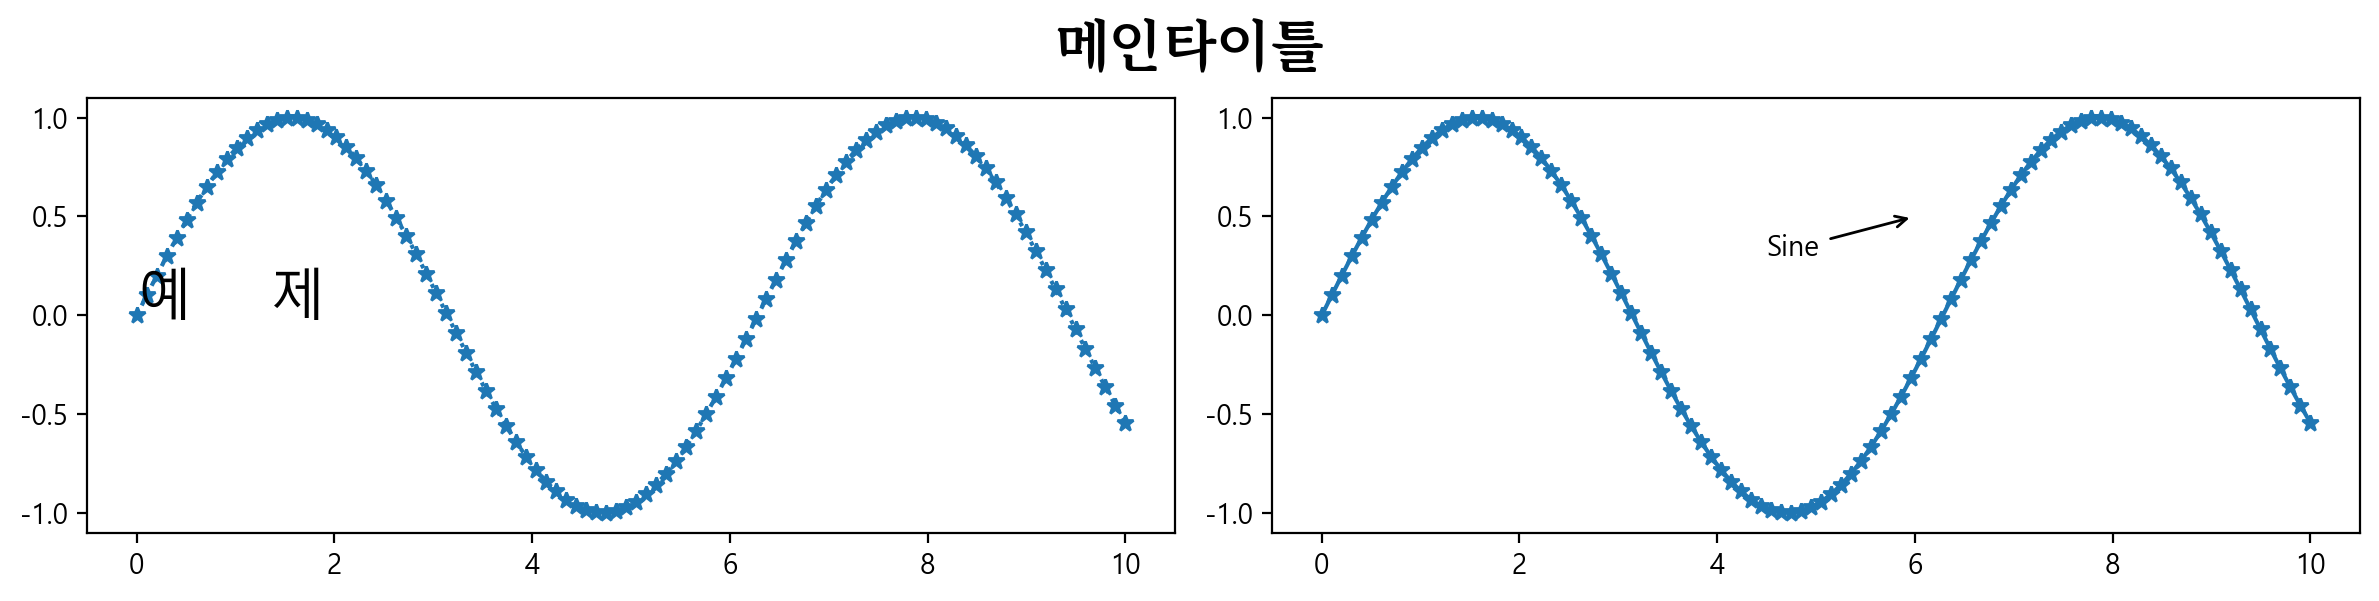

In [32]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.text
fig, axes = plt.subplots(1,2, figsize=(12,3))
axes[0].plot(x,y, marker='*', linestyle=':') 
axes[0].text(0, 0, '예    제', style='italic', fontsize=20)
# 한글 폰트 설정, 폰트 설정 방법
plt.rc('font', family='Malgun Gothic')   # 한글 폰트 설정, 다만 그래프의 -부호 가 깨짐
# == plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)      # 축의 - 깨짐 방지
axes[1].plot(x,y, marker='*')
axes[1].annotate('Sine', xytext=(4.5, .3),     # xytext=글자를 넣을 좌표(좌하) 
                 xy=(6, .5),                   # xy=화살표가 가르킬 위치
                 arrowprops=dict(arrowstyle='->',
                                connectionstyle='arc') # angle(꺾은선), arc(직선)..
                )  
plt.tight_layout(rect=[0,0,1,.9])  # left, bottom, right, top : 경계의 상대적 비율
plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
- 수학 기호 : https://matplotlib.org/2.0.2/users/mathtext.html

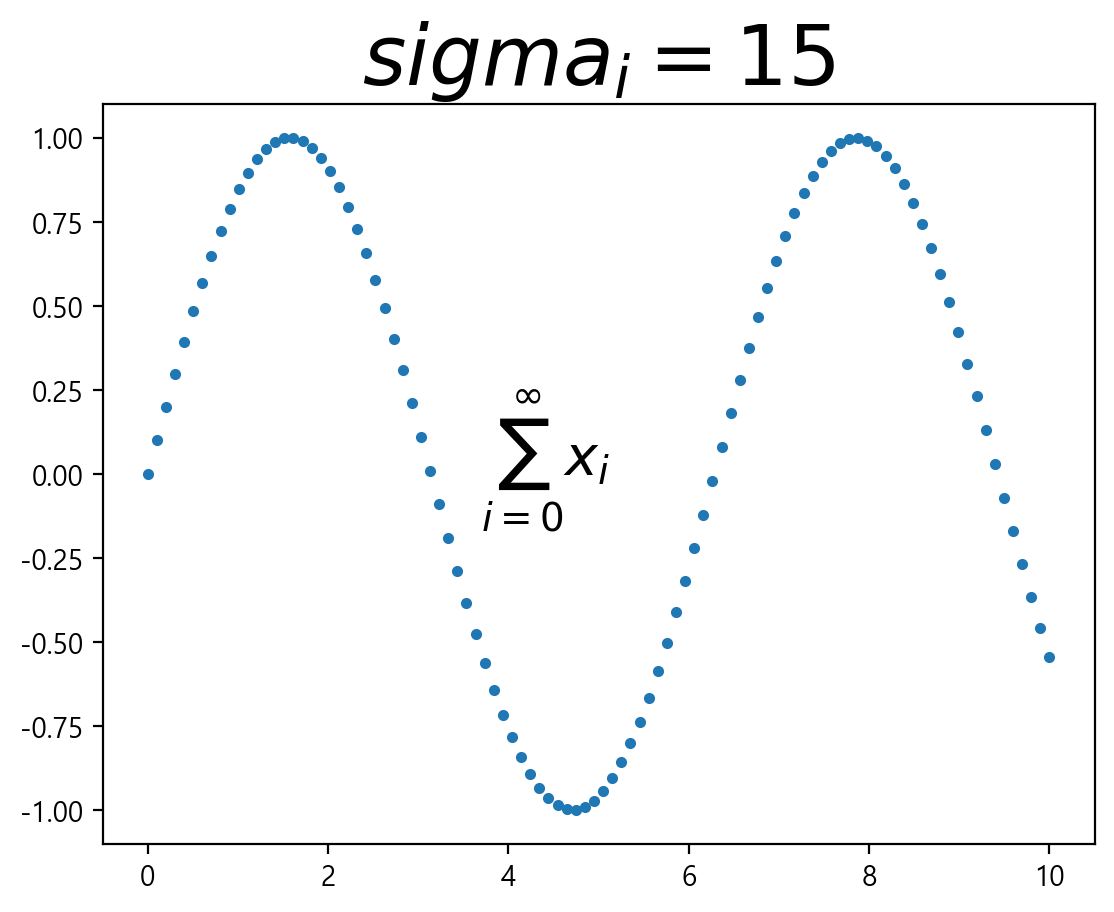

In [41]:
plt.scatter(x,y, marker='.')
plt.title(r'$sigma_i=15$', fontsize=30)
plt.text(3.7,0, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.show()

### 4) 축과 눈금
- https://matplotlib.org/3.1.0/api/axis_api.html (교안33p)

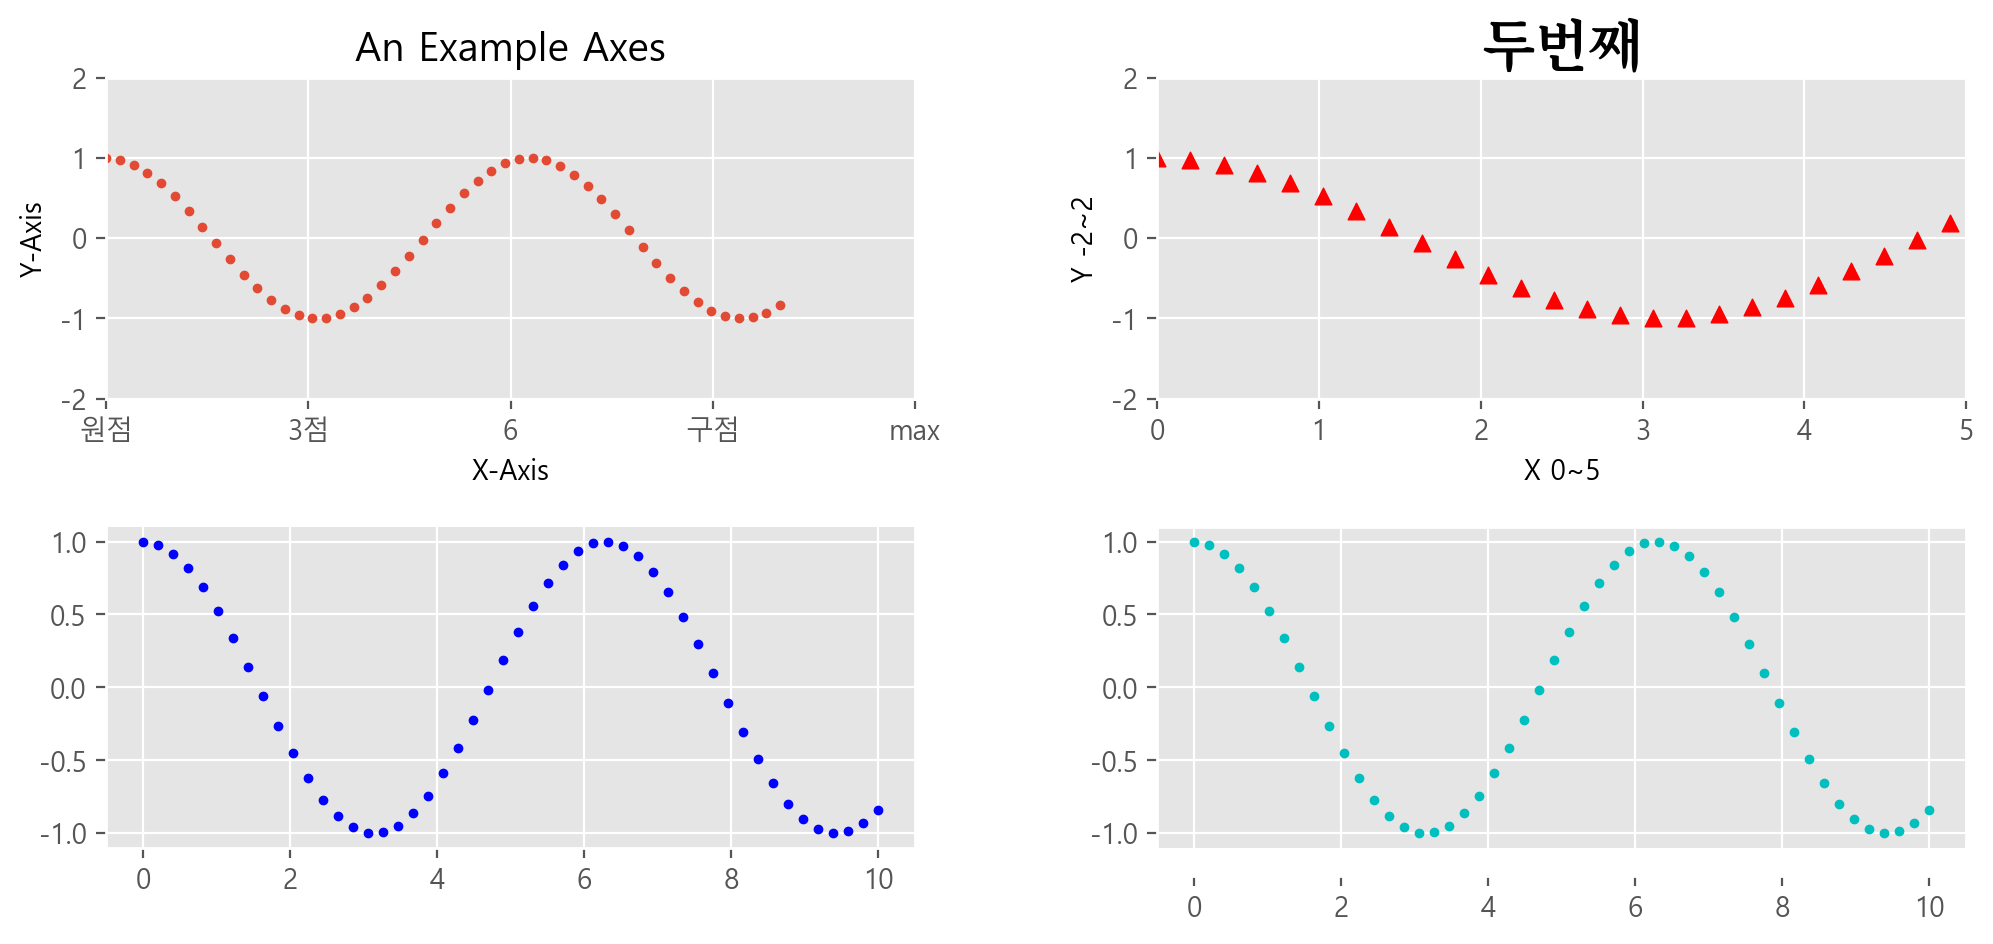

In [82]:
x = np.linspace(0,10) #0부터 10까지 50개 값을 배열로 생성
y = np.cos(x)
fig, ax = plt.subplots(2,2, figsize=(12,5))
# 서브플롯간의 여백 조정(hspace 위아래 여백, wspace 좌우여백)
plt.subplots_adjust(hspace=0.4, wspace=0.3 )
ax[0,0].scatter(x,y,marker='.')
ax[0,0].set(title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis',
           xlim=[0,12],  # X축 눈금의 범위
           ylim=[-2,2],  # Y축 눈금의 범위
           xticks=[0,3,6,9,12],  # X축 눈금
           xticklabels = ['원점', '3점', 6, '구점', 'max'] # X축 눈금 라벨
           )

ax[0,1].scatter(x,y,marker='^', c='r')
ax[0,1].set_xlim(0,5)  # == set(xlim=[0,5])
ax[0,1].set_ylim(-2,2)
ax[0,1].set_title('두번째', fontsize=20, fontproperties=font_prop)  # 타이틀에 대한 상세 설정 가능
ax[0,1].set_xlabel('X 0~5')
ax[0,1].set_ylabel('Y -2~2')
ax[1,0].scatter(x,y,marker='.', c='b')
ax[1,0].spines['top'].set_visible(False)
ax[1,1].scatter(x,y,marker='.', c='c')
ax[1,1].spines['bottom'].set_position( ('outward', 10) )
ax[1,1].grid(True)

### 5) 축공유
- 딥러닝할때 무조건 사용할 수 밖에 없다

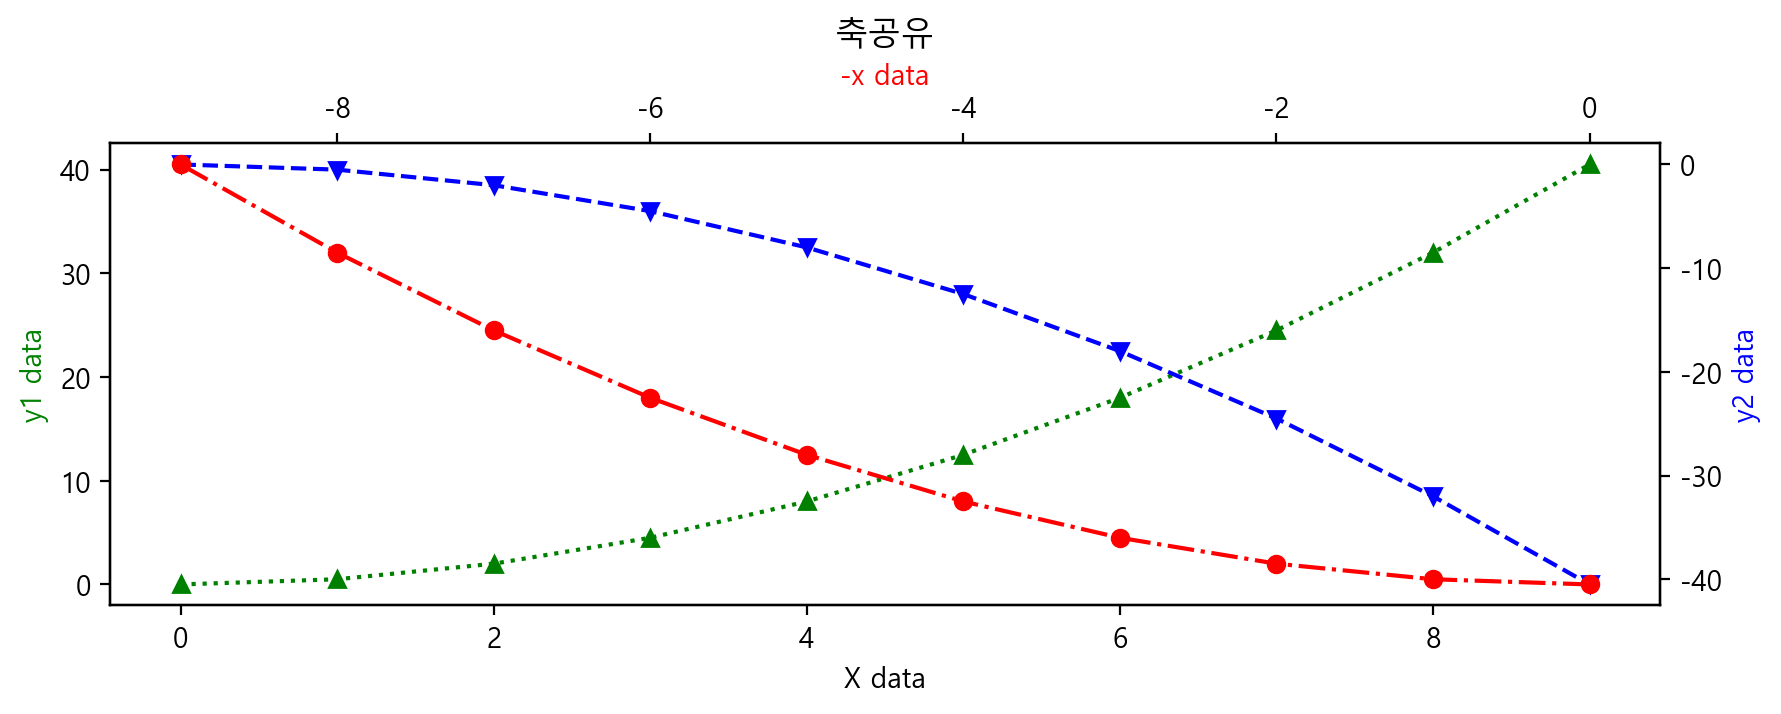

In [71]:
x = np.arange(0,10)
y1 = 0.5 * x**2
y2 = -1 * y1

fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='X data')
ax1.set_ylabel('y1 data', color='g')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'bv--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례 표시
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안20page)

### 7) 플롯스타일 지정

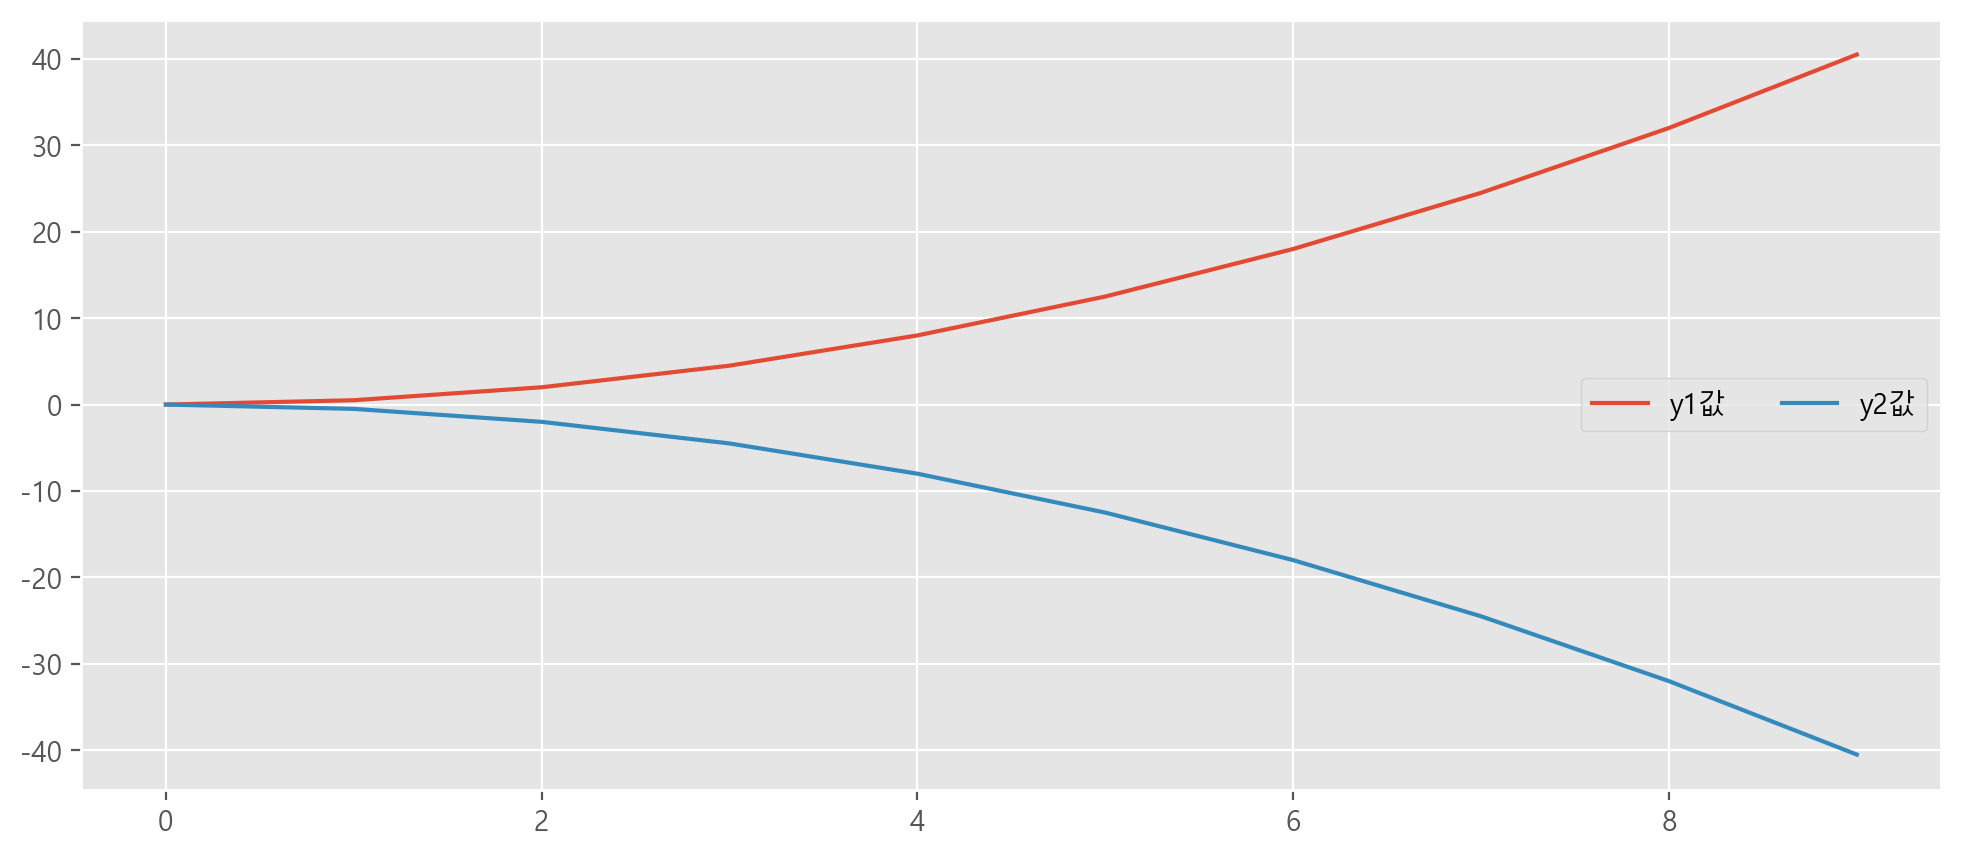

In [79]:
plt.style.use('ggplot') # 스타일 지정하는 함수를 쓰면 모든 설정이 초기화
plt.figure(figsize=(12,5))
plt.plot(x, y1, label='y1값')
plt.plot(x, y2, label='y2값')
plt.legend(loc='center right', ncol=2) # bbox_to_anchor=(0.1,1)와 같이 위치 지정 가능
plt.show()